In [1]:
# import usual suspects
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy

In [2]:
# setup hyper parameters

learning_Rate = 0.01
training_Epochs = 1000
display_Step = 50


In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# get total rows of train_X
n_samples = train_X.shape[0]

In [4]:
#  tf Graph Input
X = tf.placeholder('float')
Y = tf.placeholder('float')


In [5]:
# Set model weights
W = tf.Variable(numpy.random.randn(), name= 'weight')
b = tf.Variable(numpy.random.randn(), name = 'bias')

In [6]:
# construct a Linear model y = XW + b
pred = tf.add(tf.multiply(X, W), b)

In [7]:
# mean squared error
cost = tf.reduce_sum(tf.pow(pred - Y,2)) / (2 * n_samples)

In [8]:
# Optimizer, we wil use Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_Rate).minimize(cost)

In [10]:
# Initialize the tf.Variables
init = tf.global_variables_initializer()

Epoch= 50 Cost= 0.107132 W= 0.152871 b= 1.49728
Epoch= 100 Cost= 0.103661 W= 0.158623 b= 1.4559
Epoch= 150 Cost= 0.100591 W= 0.164034 b= 1.41698
Epoch= 200 Cost= 0.0978744 W= 0.169122 b= 1.38037
Epoch= 250 Cost= 0.0954709 W= 0.173908 b= 1.34594
Epoch= 300 Cost= 0.0933444 W= 0.17841 b= 1.31356
Epoch= 350 Cost= 0.0914628 W= 0.182643 b= 1.2831
Epoch= 400 Cost= 0.0897981 W= 0.186626 b= 1.25445
Epoch= 450 Cost= 0.0883251 W= 0.190371 b= 1.22751
Epoch= 500 Cost= 0.087022 W= 0.193893 b= 1.20217
Epoch= 550 Cost= 0.085869 W= 0.197205 b= 1.17834
Epoch= 600 Cost= 0.0848488 W= 0.200321 b= 1.15593
Epoch= 650 Cost= 0.083946 W= 0.203251 b= 1.13485
Epoch= 700 Cost= 0.0831472 W= 0.206007 b= 1.11502
Epoch= 750 Cost= 0.0824403 W= 0.2086 b= 1.09637
Epoch= 800 Cost= 0.0818148 W= 0.211038 b= 1.07883
Epoch= 850 Cost= 0.0812613 W= 0.213331 b= 1.06234
Epoch= 900 Cost= 0.0807714 W= 0.215488 b= 1.04682
Epoch= 950 Cost= 0.0803379 W= 0.217516 b= 1.03223
Epoch= 1000 Cost= 0.0799543 W= 0.219424 b= 1.0185

 Optimizati

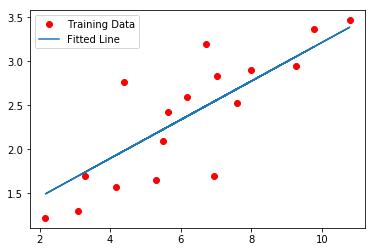

In [13]:
# launch the graph

with tf.Session() as sess:
    #initizlie all teh variables
    sess.run(init)
    
    #fit all training data, so run through all training epochs 
    for epoch in range(training_Epochs):
        
        # we need to run optimizer in session through train X and train Y
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        # now let's print cost, with W and b for each display step under already running epoch step
        # we will go through epoch 1 to last epoch and calcualte cost and print only when modulo is 0
        # modulo will be 0 for each 0 ending display step, 50, 100, 150,....1000
        if (epoch+1) % display_Step == 0:
            c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print ('Epoch=', epoch+1, 'Cost=', c, 'W=', sess.run(W), 'b=', sess.run(b))
            
    # print optimization finished when epochs ends
    print ('\n Optimization Finished!')
    
    # Calculate and print final training cost
    training_Cost = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
    print ('\n Training Cost=', training_Cost, 'W=', sess.run(W), 'b=', sess.run(b))
    
    #Now, let's plot graph to show, where was our training data plotted
    # and where is our line of linear regression among them
    plt.plot(train_X, train_Y, 'ro', label='Training Data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted Line')
    plt.legend()
    plt.show()
    